**MACHINE LEARNING - BALANCEO**

CESAR PAOLO TACO APOLO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv('bank-additional-full.csv',sep=";")

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba7bd5bd10>,
      dtype=object)

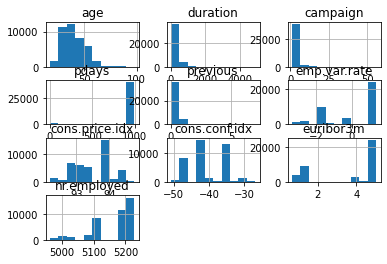

In [7]:
data.hist()

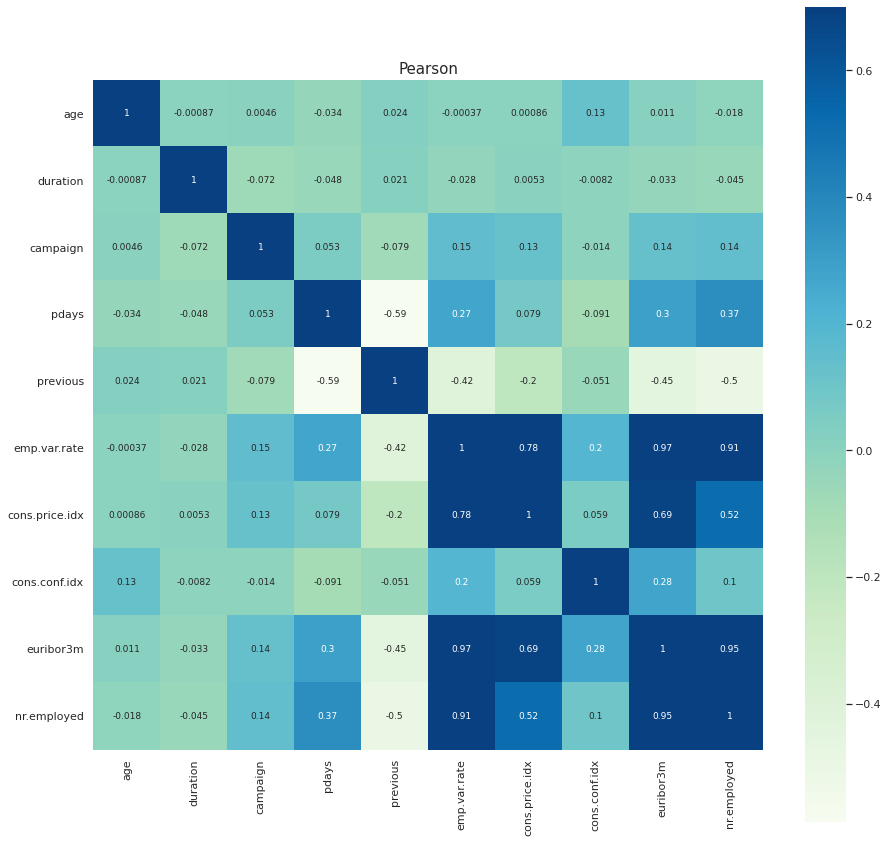

In [8]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson', fontsize=15)
sns.heatmap(data.corr(),vmax = 0.7, square = True, cmap='GnBu',linecolor='b',annot=True,annot_kws={'size':9})

In [9]:
x_aux = data.iloc[:,0:20]
x_aux = x_aux.drop(['pdays'],axis=1)
X = pd.get_dummies(x_aux)
y = data.iloc[:,20]

In [10]:
X

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [11]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [12]:
X.shape

(41188, 62)

In [13]:
y.shape

(41188,)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_admin.                     41188 non-null  uint8  
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

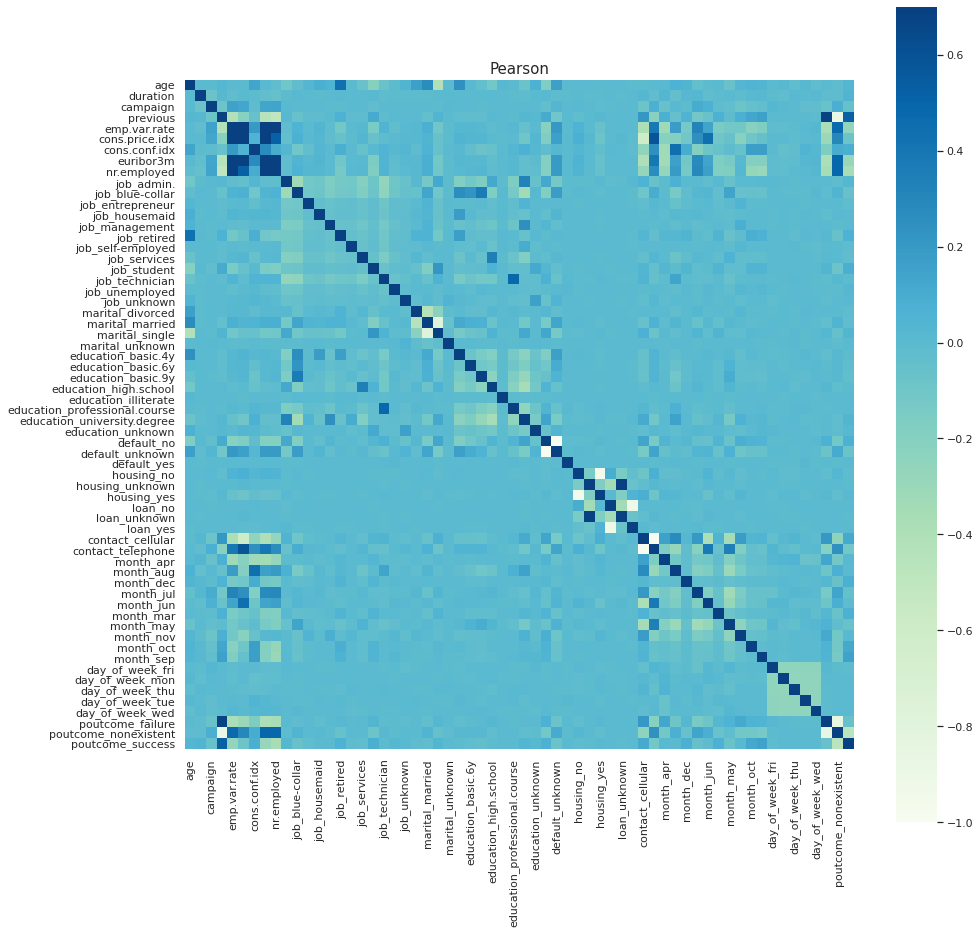

In [15]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson', fontsize=15)
sns.heatmap(X.corr(),vmax = 0.7, square = True, cmap='GnBu',linecolor='b',annot=False,annot_kws={'size':9})

In [16]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [17]:
lenc = LabelEncoder()
y = lenc.fit_transform(y)

**Under Sampler**

In [18]:
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X,y)
pd.Series(y_rus).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    4640
0    4640
dtype: int64

**Over Sampler**

In [19]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X,y)
pd.Series(y_ros).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    36548
0    36548
dtype: int64

**SMOTE**

In [20]:
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X,y)
pd.Series(y_sm).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    36548
0    36548
dtype: int64

In [21]:
y_sm

array([0, 0, 0, ..., 1, 1, 1])

**FUNCIONES**
*TrainTestSplit*
*Escalado*
*PCA*

In [22]:
def trainTestSplit(X,y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
  return X_train,X_test,y_train,y_test

def escalado(X_train,X_test):
  sc = StandardScaler()
  sc.fit(X_train)
  return sc.transform(X_train),sc.transform(X_test)

def generadorPCA(n_components,X):
  pca = PCA(n_components=n_components)
  cp = pca.fit_transform(X)
  return pd.DataFrame(data=cp)

def model():
  model = Sequential()
  model.add(Dense(18,activation='relu'))
  model.add(Dense(7,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics =['accuracy'])
  #binary_crossentropy / categorical_crossentropy
  return model

sin escalado sin PCA sin balanceo 

In [23]:
X

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [24]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [26]:
model_sinPCA_sinBalanceo = model()

In [27]:
model_sinPCA_sinBalanceo.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=200,epochs=30,verbose=1)

Epoch 1/30
155/155 [==============================] - 2s 4ms/step - loss: 23.1980 - accuracy: 0.6089 - val_loss: 0.6798 - val_accuracy: 0.8865
Epoch 2/30
155/155 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.8881 - val_loss: 0.6230 - val_accuracy: 0.8856
Epoch 3/30
155/155 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.8878 - val_loss: 0.5800 - val_accuracy: 0.8859
Epoch 4/30
155/155 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.8878 - val_loss: 0.5473 - val_accuracy: 0.8858
Epoch 5/30
155/155 [==============================] - 0s 3ms/step - loss: 0.5328 - accuracy: 0.8878 - val_loss: 0.5180 - val_accuracy: 0.8858
Epoch 6/30
155/155 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.8878 - val_loss: 0.4922 - val_accuracy: 0.8858
Epoch 7/30
155/155 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.8878 - val_loss: 0.4698 - val_accuracy: 0.8858
Epoch

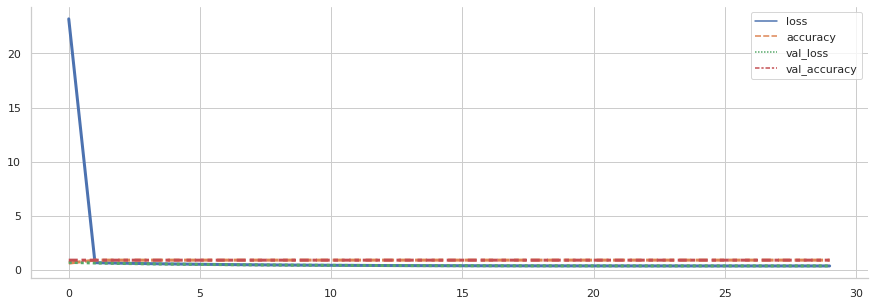

In [28]:
loss_sinNada = pd.DataFrame(model_sinPCA_sinBalanceo.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss_sinNada,lw=3)
sns.despine()

Sin escalado con PCA sin balanceo 

In [29]:
X_train,X_test,y_train,y_test=train_test_split(generadorPCA(2,X),y)

In [30]:
model_conPCA_sinBalanceo=model()

In [31]:
model_conPCA_sinBalanceo.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 1.6927 - accuracy: 0.7734 - val_loss: 0.3277 - val_accuracy: 0.8749
Epoch 2/30
124/124 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.8805 - val_loss: 0.2653 - val_accuracy: 0.8827
Epoch 3/30
124/124 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.8844 - val_loss: 0.2560 - val_accuracy: 0.8843
Epoch 4/30
124/124 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.8853 - val_loss: 0.2499 - val_accuracy: 0.8855
Epoch 5/30
124/124 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.8883 - val_loss: 0.2442 - val_accuracy: 0.8896
Epoch 6/30
124/124 [==============================] - 0s 3ms/step - loss: 0.2395 - accuracy: 0.8884 - val_loss: 0.2440 - val_accuracy: 0.8874
Epoch 7/30
124/124 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.8924 - val_loss: 0.2405 - val_accuracy: 0.8906
Epoch 

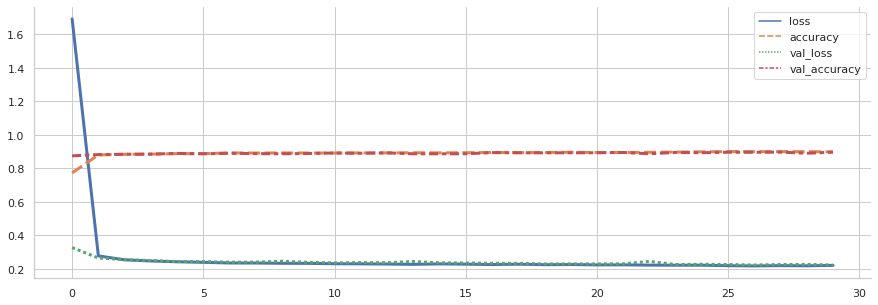

In [32]:
loss = pd.DataFrame(model_conPCA_sinBalanceo.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

Sin escalado sin PCA y con balanceo OVER

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X_ros,y_ros)

In [34]:
model_sinPCA_conOver = model()

In [35]:
model_sinPCA_conOver.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=500,epochs=30,verbose=1)

Epoch 1/30
110/110 [==============================] - 1s 4ms/step - loss: 5.1691 - accuracy: 0.6357 - val_loss: 0.8953 - val_accuracy: 0.6835
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.7795 - val_loss: 0.6190 - val_accuracy: 0.7815
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.8133 - val_loss: 0.4919 - val_accuracy: 0.8424
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.8304 - val_loss: 0.4731 - val_accuracy: 0.8136
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.8255 - val_loss: 0.6302 - val_accuracy: 0.8145
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.8370 - val_loss: 0.4951 - val_accuracy: 0.7939
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8472 - val_loss: 0.3845 - val_accuracy: 0.8420
Epoch 

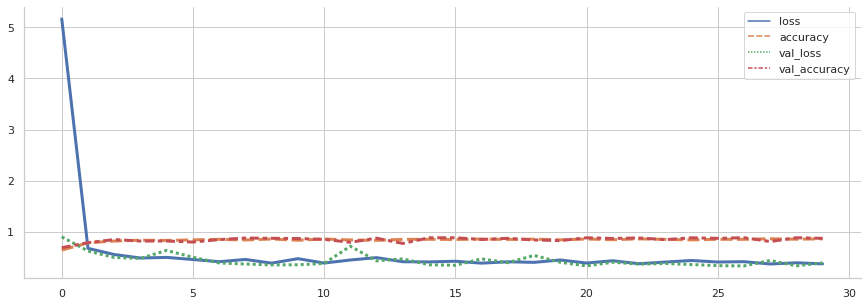

In [36]:
loss = pd.DataFrame(model_sinPCA_conOver.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

Sin escalado sin PCA y con balanceo UNDER

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X_rus,y_rus)

In [38]:
model_sinPCA_conUnder = model()

In [39]:
model_sinPCA_conUnder.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

Epoch 1/30
28/28 [==============================] - 1s 9ms/step - loss: 20.1194 - accuracy: 0.5677 - val_loss: 2.1158 - val_accuracy: 0.6819
Epoch 2/30
28/28 [==============================] - 0s 3ms/step - loss: 1.3136 - accuracy: 0.7158 - val_loss: 0.9973 - val_accuracy: 0.7397
Epoch 3/30
28/28 [==============================] - 0s 3ms/step - loss: 1.0543 - accuracy: 0.7381 - val_loss: 0.9465 - val_accuracy: 0.7466
Epoch 4/30
28/28 [==============================] - 0s 3ms/step - loss: 0.9848 - accuracy: 0.7391 - val_loss: 0.9109 - val_accuracy: 0.7319
Epoch 5/30
28/28 [==============================] - 0s 4ms/step - loss: 0.9214 - accuracy: 0.7389 - val_loss: 0.8246 - val_accuracy: 0.7448
Epoch 6/30
28/28 [==============================] - 0s 3ms/step - loss: 0.8614 - accuracy: 0.7408 - val_loss: 0.7761 - val_accuracy: 0.7513
Epoch 7/30
28/28 [==============================] - 0s 3ms/step - loss: 0.7964 - accuracy: 0.7409 - val_loss: 0.7176 - val_accuracy: 0.7487
Epoch 8/30
28/28 [=

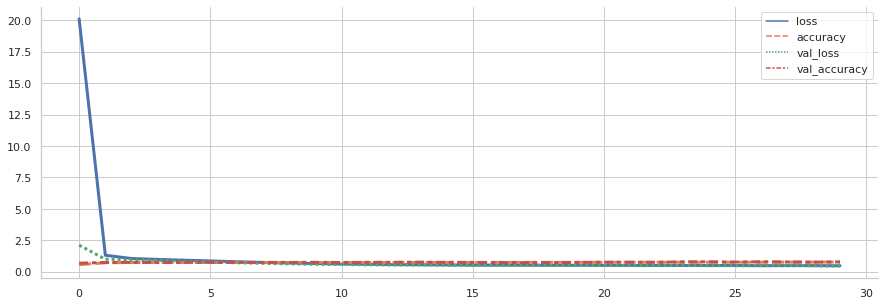

In [40]:
loss = pd.DataFrame(model_sinPCA_conUnder.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

Sin escalado sin PCA y con balanceo SMOTE

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm)

In [42]:
model_sinPCA_conSM = model()

In [43]:
model_sinPCA_conSM.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=350,epochs=30,verbose=1)

Epoch 1/30
157/157 [==============================] - 1s 3ms/step - loss: 72.3773 - accuracy: 0.5909 - val_loss: 0.9194 - val_accuracy: 0.8091
Epoch 2/30
157/157 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.8295 - val_loss: 0.4962 - val_accuracy: 0.8180
Epoch 3/30
157/157 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8477 - val_loss: 0.4245 - val_accuracy: 0.8646
Epoch 4/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8545 - val_loss: 0.4654 - val_accuracy: 0.7927
Epoch 5/30
157/157 [==============================] - 0s 3ms/step - loss: 0.3797 - accuracy: 0.8593 - val_loss: 0.3890 - val_accuracy: 0.8573
Epoch 6/30
157/157 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8505 - val_loss: 0.4383 - val_accuracy: 0.8087
Epoch 7/30
157/157 [==============================] - 0s 3ms/step - loss: 0.3727 - accuracy: 0.8566 - val_loss: 0.3983 - val_accuracy: 0.8325
Epoch

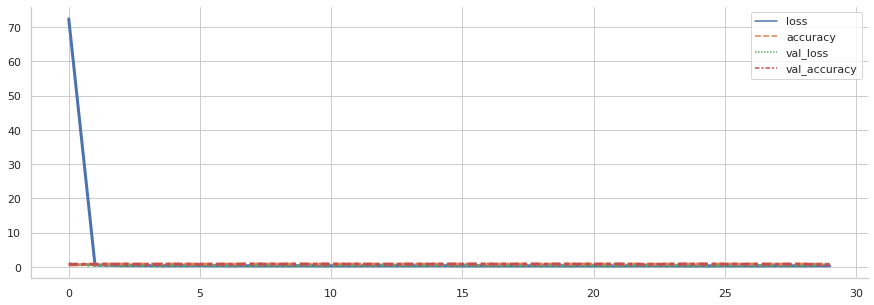

In [44]:
loss = pd.DataFrame(model_sinPCA_conSM.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

Sin escalado con PCA y con balanceo OVER

In [45]:
X_train,X_test,y_train,y_test=train_test_split(generadorPCA(2,X_ros),y_ros)

In [46]:
model_conPCA_conOver = model()

In [47]:
model_conPCA_conOver.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=500,epochs=30,verbose=1)

Epoch 1/30
110/110 [==============================] - 1s 3ms/step - loss: 2.0655 - accuracy: 0.7624 - val_loss: 0.4584 - val_accuracy: 0.8480
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8482 - val_loss: 0.3773 - val_accuracy: 0.8502
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8498 - val_loss: 0.3634 - val_accuracy: 0.8485
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8512 - val_loss: 0.3688 - val_accuracy: 0.8474
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8501 - val_loss: 0.3624 - val_accuracy: 0.8453
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8509 - val_loss: 0.3776 - val_accuracy: 0.8461
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8503 - val_loss: 0.3562 - val_accuracy: 0.8522
Epoch 

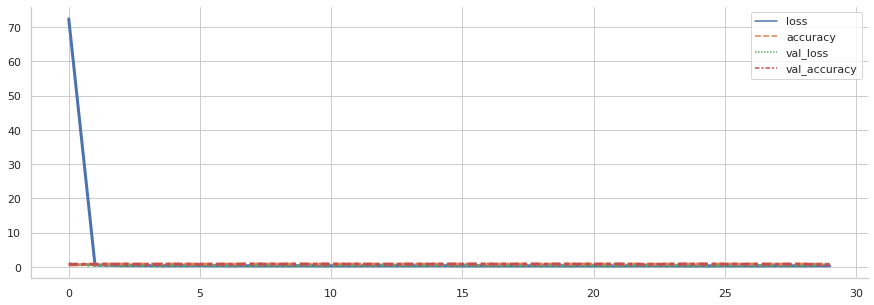

In [48]:
loss = pd.DataFrame(model_sinPCA_conSM.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

Sin escalado con PCA y con balanceo UNDER

In [49]:
X_train,X_test,y_train,y_test=train_test_split(generadorPCA(2,X_rus),y_rus)

In [50]:
model_conPCA_conUnder = model()

In [51]:
model_conPCA_conUnder.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

Epoch 1/30
28/28 [==============================] - 1s 8ms/step - loss: 18.3949 - accuracy: 0.6342 - val_loss: 12.5439 - val_accuracy: 0.6698
Epoch 2/30
28/28 [==============================] - 0s 3ms/step - loss: 7.7761 - accuracy: 0.6865 - val_loss: 3.9893 - val_accuracy: 0.7000
Epoch 3/30
28/28 [==============================] - 0s 3ms/step - loss: 1.7557 - accuracy: 0.7947 - val_loss: 1.0816 - val_accuracy: 0.8435
Epoch 4/30
28/28 [==============================] - 0s 3ms/step - loss: 1.0021 - accuracy: 0.8369 - val_loss: 0.8471 - val_accuracy: 0.8384
Epoch 5/30
28/28 [==============================] - 0s 3ms/step - loss: 0.7771 - accuracy: 0.8318 - val_loss: 0.6590 - val_accuracy: 0.8332
Epoch 6/30
28/28 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.8287 - val_loss: 0.5260 - val_accuracy: 0.8306
Epoch 7/30
28/28 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.8335 - val_loss: 0.4497 - val_accuracy: 0.8384
Epoch 8/30
28/28 [

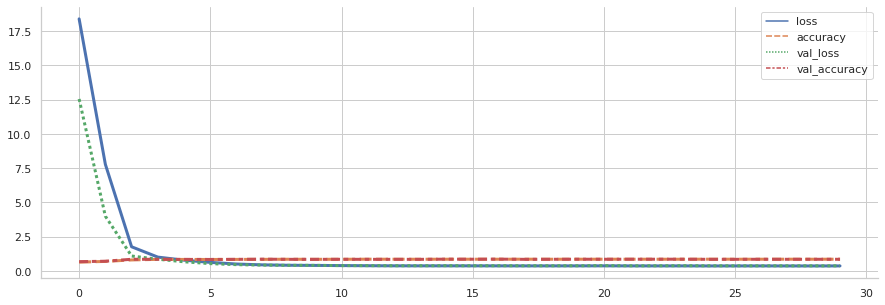

In [52]:
loss = pd.DataFrame(model_conPCA_conUnder.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

Modelo muy robusto para el problema 

Sin embargo el modelo se comporta bien debido al PCA

acurracy = 0.8414 -> val_accuracy = 0.8467

Sin escalado con PCA y con balanceo SMOTE

In [53]:
X_train,X_test,y_train,y_test=train_test_split(generadorPCA(2,X_sm),y_sm)

In [54]:
model_conPCA_conSM = model()

In [55]:
model_conPCA_conSM.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=350,epochs=30,verbose=1)

Epoch 1/30
157/157 [==============================] - 1s 3ms/step - loss: 4.5082 - accuracy: 0.7903 - val_loss: 0.7030 - val_accuracy: 0.8183
Epoch 2/30
157/157 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.8371 - val_loss: 0.3814 - val_accuracy: 0.8405
Epoch 3/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8471 - val_loss: 0.3749 - val_accuracy: 0.8477
Epoch 4/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8490 - val_loss: 0.3713 - val_accuracy: 0.8495
Epoch 5/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8491 - val_loss: 0.3591 - val_accuracy: 0.8460
Epoch 6/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8499 - val_loss: 0.3572 - val_accuracy: 0.8492
Epoch 7/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8503 - val_loss: 0.3618 - val_accuracy: 0.8513
Epoch 

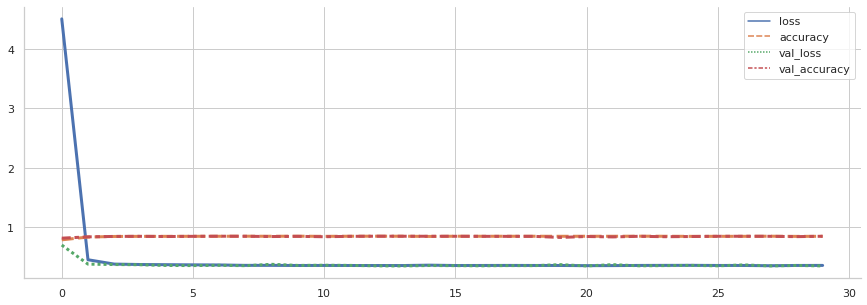

In [56]:
loss = pd.DataFrame(model_conPCA_conSM.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()